In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv('mega_global_cleaned.csv')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 9.530646320785147
R-squared: 0.832493865626615


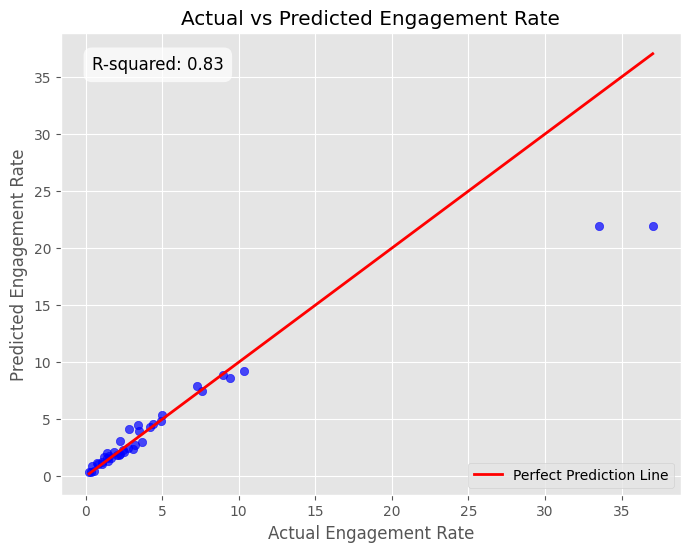

In [20]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

plt.title('Actual vs Predicted Engagement Rate')
plt.xlabel('Actual Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Residuals plot
residuals = y - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.grid(True)
plt.show()


ValueError: operands could not be broadcast together with shapes (194,) (39,) 

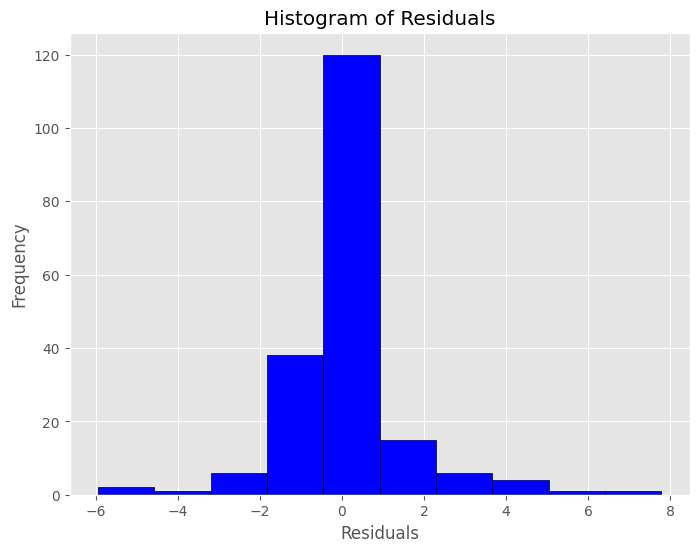

In [11]:
# Histogram of residuals
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
